In [3]:
function trapRule(f::Function, a::Real, b::Real, num = 10)
  local h = (b-a)/num
  0.5*h*sum(map(f,a:h:b-h)+map(f,a+h:h:b))
end

trapRule (generic function with 2 methods)

In [5]:
function trapRule(f::Function, a::Real, b::Real, n::Integer = 10)
  n > 0 || throw(ArgumentError("The number of trapezoids, n, must positive."))
  a < b || throw(ArgumentError("The left endpoint must be less than the right endpoint."))
  local h = (b-a)/n
  local xpts = LinRange(a,b,n+1)
  (h/2)*(f(a)+f(b) + 2*sum(f,xpts[2:end-1]))
end

trapRule (generic function with 3 methods)

In [6]:
trapRule(x -> exp(-x^2), 0, 2, 4)

0.8806186341245393

In [5]:
function trapRule(f::Function, a::Real, b::Real; num=10)
  local h = (b-a)/num
  # 0.5*h*sum(map(f,a:dx:b-dx) + map(f,a+dx:dx:b))
  (h/2)*(f(a) + f(b) + 2*sum(f,LinRange(a+h,b-h,num-1)))
end

trapRule (generic function with 2 methods)

In [8]:
function simpsonsRule(f::Function, a::Real, b::Real, n::Integer = 10)
  n > 0 || throw(ArgumentError("The number of subintervals, n, must be positive."))
  n % 2 == 0 || throw(ArgumentError("The number of subintervals, n, must be even."))
  a < b || throw(ArgumentError("The left endpoint must be less than the right endpoint."))
  local h = (b-a)/n
  xpts = LinRange(a,b,n+1)
  (h/3)*(f(a)+f(b) + 4*sum(f,xpts[2:2:end-1]) + 2*sum(f,xpts[3:2:end-2]))
end

simpsonsRule (generic function with 2 methods)

In [9]:
simpsonsRule(x->x^2,0,3,10)

9.0

In [10]:
simpsonsRule(x -> exp(-x^2), 0, 2, 10)

0.882074876854494

In [13]:
erf(2)

0.8820813901111865

In [12]:
function erf(x::Real)
  local area = simpsonsRule(t -> exp(-t^2),0,abs(x),100)
  x > 0 ? area : -1*area
end

erf (generic function with 1 method)

In [15]:
using CairoMakie
CairoMakie.activate!()
Makie.inline!(true)

true

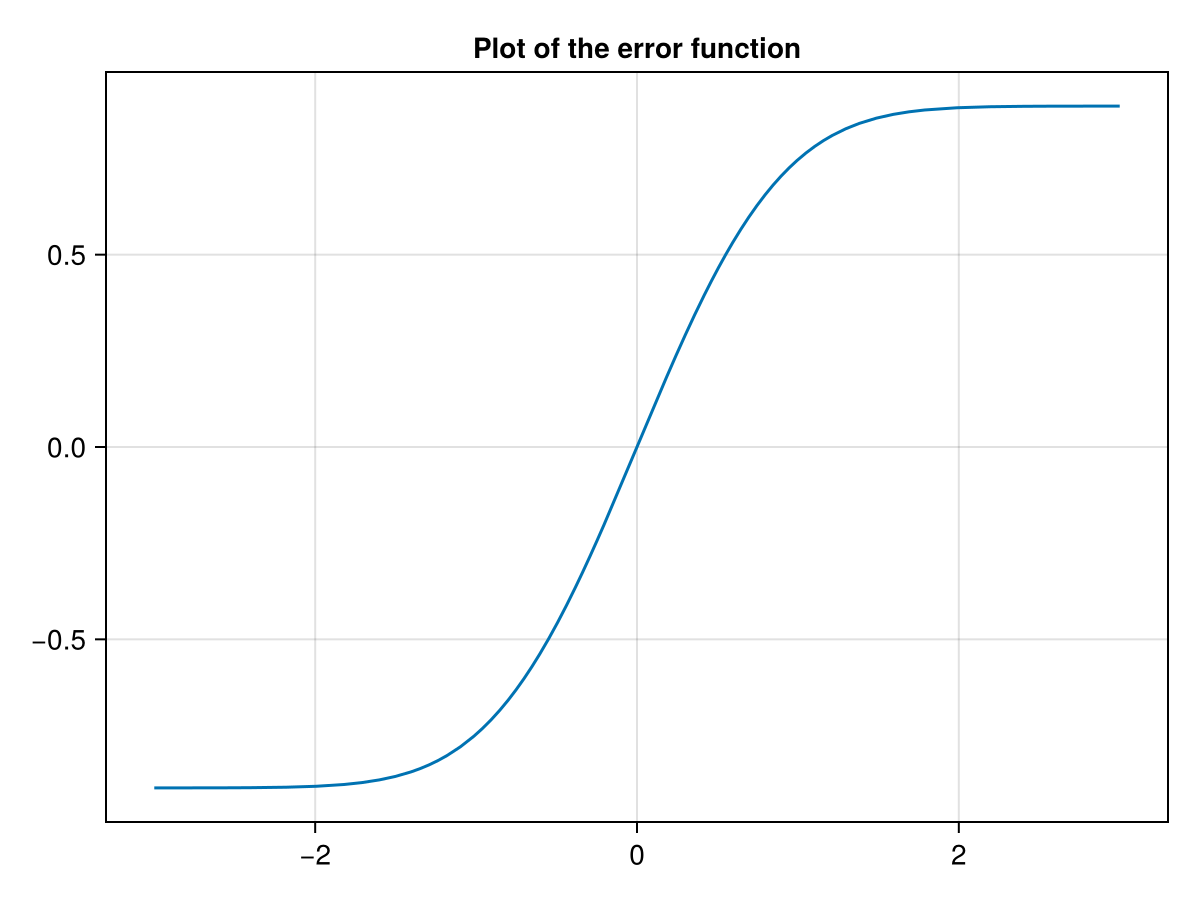

In [18]:
fig = lines(-3..3, erf, axis = (title="Plot of the error function",))

In [19]:
save("../assets/plots/num-int/erf.png", fig)

CairoMakie.Screen{IMAGE}


In [24]:
using NumericalIntegration
x = LinRange(0,2,101)
y = map(x -> exp(-x^2),x) ## compute an array of y based on each x
v = integrate(x,y)

0.8820789488400429